

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> Thousands of medical appointments and its associated variables (characteristics), the dataset has information about each patient and his appointment and more importantly did the patient come or not, we will discover from this dataset if a certain characteristics pre determine if the patient will come to the appointment or not 


### Question(s) for Analysis

> **Why** would a patient schedule an appointment and miss it ? 

> **Did** the patient had a liabilty that pervented him from coming ? 

> **What** age group miss the appointment most ? 


In [1]:
# importing important libararies 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
#functions to plot attributes and to make our code DRY
def plot_relations(list_of_attributes,data):
    rows= len(list_of_attributes)
    cols=2
    appointment_status=['missed','attended']
    #setting up plot grid and colors
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 20))
    colors =['maroon','green','orangered','blue','aquamarine','goldenrod','indigo']
    
    #adjusting plot margins
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4) 
    
    #loop to plot graphs in a grid
    #plot over the rows 
    for i in range(rows) :
        #plot over the columns
        color_for_row=random.choice(colors)
        for j in range(cols):
            axes[i,j].hist(list_of_attributes[i],data = data[j],color=color_for_row)
            axes[i,j].title.set_text('%s for people who %s appointment'%(list_of_attributes[i],appointment_status[j]))
            axes[i,j].set_ylabel('COUNT')
            axes[i,j].set_xlabel('%s'%(list_of_attributes[i]))


<a id='wrangling'></a>
## Data Wrangling

> **The** next step after defining our questions would be **Data Wrangling**, in which we will perform three main steps, first we will load the data to our workspace, then we will proceed to assing the data and making sure that the quality and structure of it is right, finally we will clean our data as we enter the explore phase


In [3]:
# Loading data and viewing it
appointments = pd.read_csv('noshowappointments.csv')
appointments.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#assesing the data quality 
appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

scheduled day and appointment day are objects and that need to be fixed into date type also No-show need to be boolean


In [5]:
#checking for inconsisitences 
appointments.Gender.unique().sum()
#only male and female , no incorrect typos
appointments.Age.max()
#max of 115, doable
appointments['No-show'].unique().sum()
#only two answers , no incorrect typos
appointments.isna().sum()
#data has no missing values!
appointments.duplicated().sum()
#data has no duplicates


0

so far the data seems to be okay in quality and structure and has no missing data

### Data Cleaning
> **This** is the final step in **Data wrangling** and then we will enter the explore phase , so we will make sure that our data is clean and of correct data types 

In [6]:
#first we will split the appointment day and scheduled day columns into date and time
appointments['AppointmentDay'] = pd.to_datetime(appointments['AppointmentDay'])
appointments['ScheduledDay'] = pd.to_datetime(appointments['ScheduledDay'])
appointments['AppointmentDay']=appointments['AppointmentDay'].dt.date
appointments['Scheduledtime']=appointments['ScheduledDay'].dt.time
appointments['ScheduledDay']=appointments['ScheduledDay'].dt.date
#now we have three columns for date and time of scheduled and appointments
#since the appointment day has zeros in the time stamp it shouldnot be included

Now since the time is fixed lets check if there is inconsistencies in the time for example if the schedule date is after the appointment date

In [7]:
#lets find some errors
appointments.query("ScheduledDay > AppointmentDay").shape

(5, 15)

we have only 5 rows with wrong data


In [8]:
appointments.query("Age < 0").shape


(1, 15)

we have only 1 rows with wrong data


In [9]:
index = appointments.query("ScheduledDay > AppointmentDay").index
index1 =appointments.query("Age < 0").index
droped_index = index.append(index1)
appointments.drop(droped_index,inplace = True)

#converting the appintments into 
appointments['No_show']= appointments['No-show'].map({'No':False,'Yes': True})
appointments.drop(['No-show'],axis = 1,inplace = True)

In [10]:
#converting age column into age groups for better visualizing 

appointments.loc[(appointments.Age < 2),  'AgeGroup'] = 'Infant'
appointments.loc[((appointments.Age >2) & (appointments.Age<= 4)),  'AgeGroup'] = 'Toddler'
appointments.loc[((appointments.Age >4) & (appointments.Age <= 13)),  'AgeGroup'] = 'Kid'
appointments.loc[((appointments.Age >13) & (appointments.Age <= 21)),  'AgeGroup'] = 'Teen'
appointments.loc[((appointments.Age >21) & (appointments.Age <= 50)),  'AgeGroup'] = 'Adult'
appointments.loc[((appointments.Age >50) & (appointments.Age <= 116)),  'AgeGroup'] = 'senior'

In [11]:
appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Scheduledtime,No_show,AgeGroup
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,18:38:08,False,senior
1,5.589980e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,16:08:27,False,senior
2,4.262960e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,16:19:04,False,senior
3,8.679510e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,17:29:31,False,Kid
4,8.841190e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,16:07:23,False,senior


In [12]:
appointments.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
Scheduledtime      object
No_show              bool
AgeGroup           object
dtype: object

Now our data is ready for the next phase of investigation, EDA

<a id='eda'></a>
## Exploratory Data Analysis


### First we will visualize the data to try and find patterns so it could help us with the analysis

First we will try and see the Correlation between missing the appointment and the rest of the data

In [13]:
appointments.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
PatientId,1.000000,0.004019,-0.004192,-0.002873,-0.006431,0.001612,0.011016,-0.007855,-0.009735,-0.001477
AppointmentID,0.004019,1.000000,-0.019109,0.022620,0.012760,0.022633,0.032947,0.014077,-0.256614,-0.162619
Age,-0.004192,-0.019109,1.000000,-0.092469,0.504599,0.292398,0.095811,0.078101,0.012629,-0.060320
Scholarship,-0.002873,0.022620,-0.092469,1.000000,-0.019738,-0.024899,0.035019,-0.008555,0.001182,0.029166
Hipertension,-0.006431,0.012760,0.504599,-0.019738,1.000000,0.433082,0.087967,0.080162,-0.006285,-0.035662
Diabetes,0.001612,0.022633,0.292398,-0.024899,0.433082,1.000000,0.018471,0.057578,-0.014561,-0.015158
Alcoholism,0.011016,0.032947,0.095811,0.035019,0.087967,0.018471,1.000000,0.004668,-0.026154,-0.000181
Handcap,-0.007855,0.014077,0.078101,-0.008555,0.080162,0.057578,0.004668,1.000000,-0.024097,-0.006290
SMS_received,-0.009735,-0.256614,0.012629,0.001182,-0.006285,-0.014561,-0.026154,-0.024097,1.000000,0.126502
No_show,-0.001477,-0.162619,-0.060320,0.029166,-0.035662,-0.015158,-0.000181,-0.006290,0.126502,1.000000


We found that there is no relation between our target and our attributes . however, correlation only happen when there is a linear relationship so let us examine further 

In [14]:
#lets seprate the data by showing for the appointments
yes_data = appointments[appointments.No_show==False]#who attended the appointment
no_data = appointments[appointments.No_show==True]#who skipped the appointment
combined_data = [no_data,yes_data]

**Univariate analysis**

we will examine how each categorical attribute affect the showing up to the appointment 

we have decided to split our attributes into two parts in order to avoid overwhelming the viewer with a lot of data visualization at once


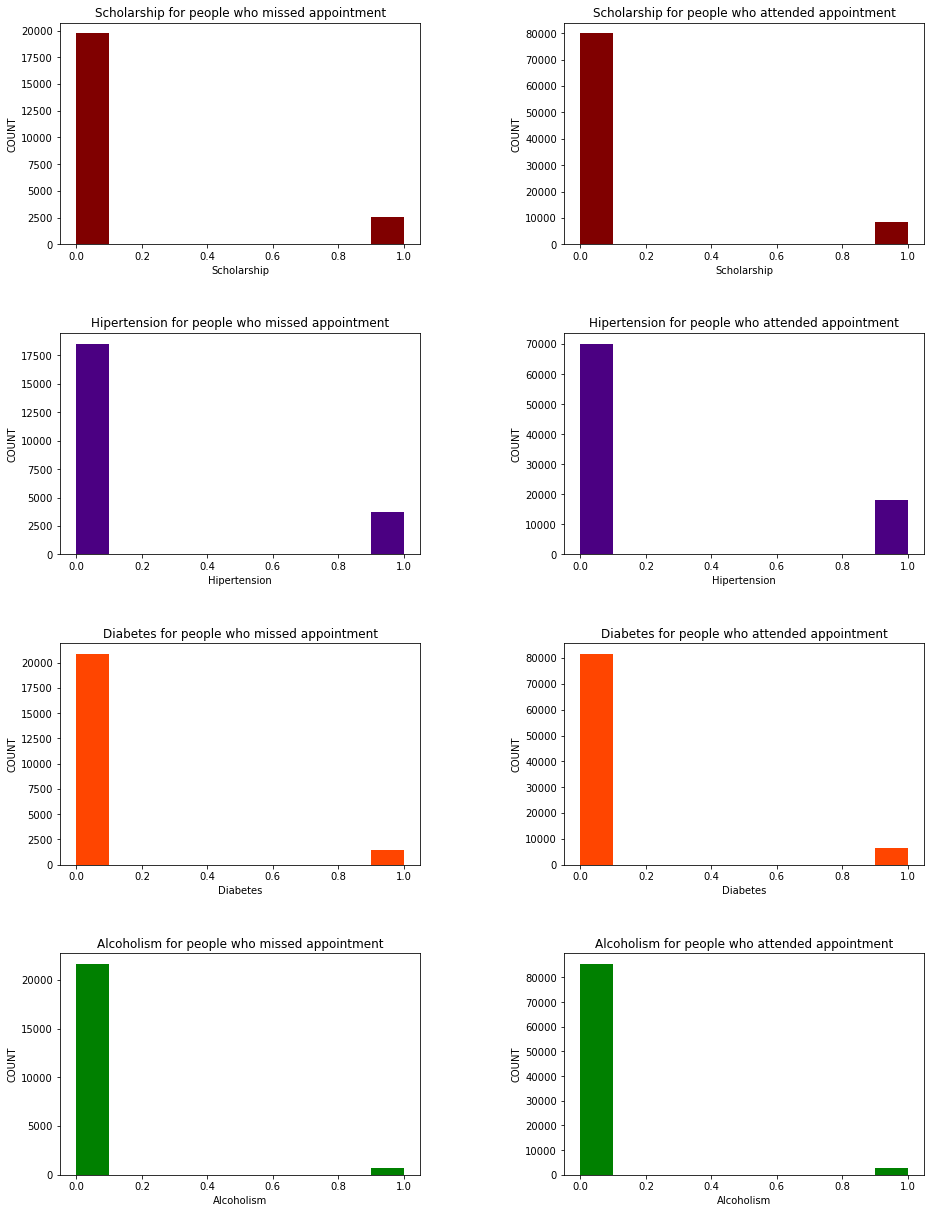

In [15]:
#we will start by scholarship, Hipertension, Diabetes and Alcholism
attributes =['Scholarship','Hipertension','Diabetes','Alcoholism']
plot_relations(attributes,combined_data)

**From these four plots we learn that :** 
Having scholarship, Hipertension, Diabetes or Alcholism will not affect whether a patient will attend or skip the appointment

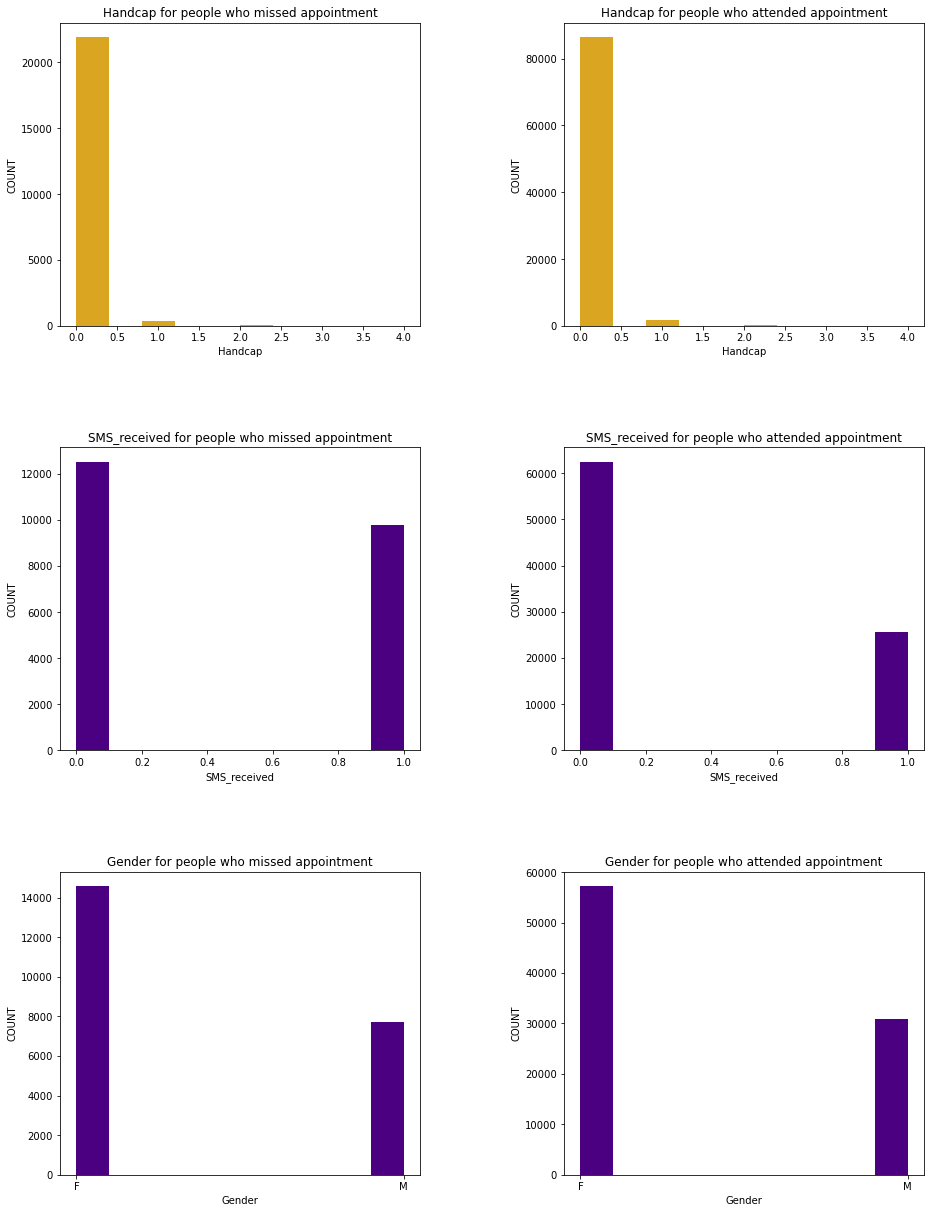

In [23]:
#next we will examine Handcap, SMS_recieved and Gender
attributes=['Handcap','SMS_received','Gender']
plot_relations(attributes,combined_data)

**From these three plots we learn that :** 
Having a handicap or being a male or a female does not affect whether a patient will attend or skip the appointment but SMS messeages seem to have an effect we can obviously see that nearly 43% of patients who missed their appointments recieved an SMS comparing to 30% of patients who attended the appointment, this actully is predictable since their was a small corrleation betwwen the SMS and patients missing their appointments 

C:\Users\fahda\AppData\Local\Temp\ipykernel_1776\2101925663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_data.sort_values(by='AgeGroup', ascending=False,inplace = True)
C:\Users\fahda\AppData\Local\Temp\ipykernel_1776\2101925663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_data.sort_values(by='AgeGroup', ascending=False,inplace = True)


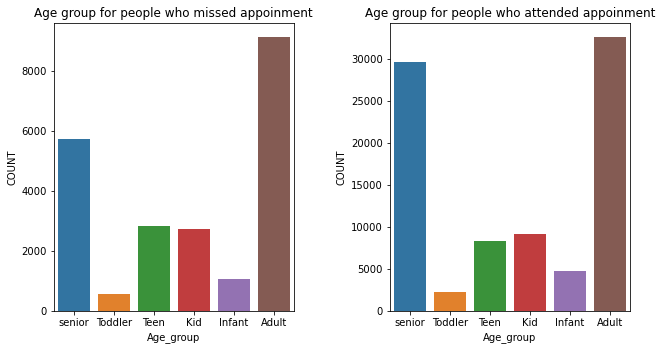

In [26]:
#finally our age group 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
yes_data.sort_values(by='AgeGroup', ascending=False,inplace = True)
no_data.sort_values(by='AgeGroup', ascending=False,inplace = True)

sns.countplot(x='AgeGroup',data = no_data,ax=axes[0])
axes[0].title.set_text('Age group for people who missed appoinment')
axes[0].set_ylabel('COUNT')
axes[0].set_xlabel('Age_group')
sns.countplot(x='AgeGroup',data = yes_data,ax=axes[1])
axes[1].title.set_text('Age group for people who attended appoinment')
axes[1].set_ylabel('COUNT')
axes[1].set_xlabel('Age_group')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


we can see that seniors have a less chance of skipping the appointments while teens tend slightly to skip their appointments

### Why would a patient schedule an appointment and miss it ?




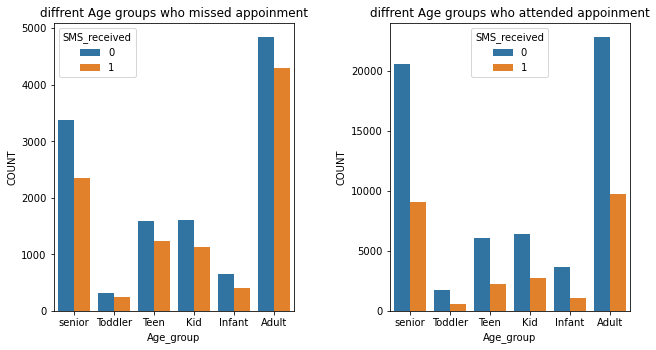

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(x='AgeGroup',data =no_data,hue ='SMS_received',ax = axes[0])
axes[0].title.set_text('diffrent Age groups who missed appoinment')
axes[0].set_ylabel('COUNT')
axes[0].set_xlabel('Age_group')
sns.countplot(x='AgeGroup',data =yes_data,hue ='SMS_received',ax = axes[1])
axes[1].title.set_text('diffrent Age groups who attended appoinment')
axes[1].set_ylabel('COUNT')
axes[1].set_xlabel('Age_group')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


we notice that in case of missed appointments patients get sms reminders, and in case of adult patient there is a 50% increase in the amount of sent texts, that drives us to a **conclusion** and maybe the answer to our first quenstion, **patients intentionaly skipped the appointment** maybe because they felt better we might need more data to verify this

### Did the patient had a liabilty that pervented him from coming ?

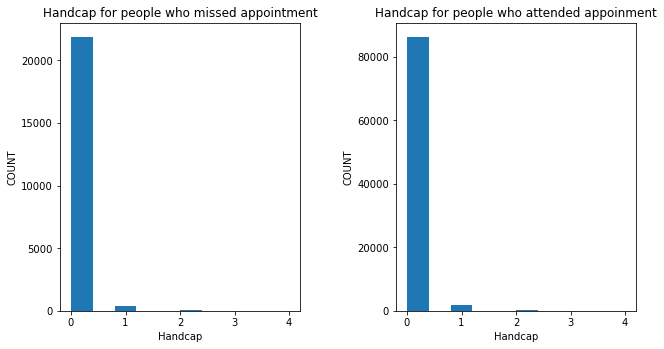

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].hist('Handcap',data = no_data )
axes[0].title.set_text('Handcap for people who missed appointment')
axes[0].set_ylabel('COUNT')
axes[0].set_xlabel('Handcap')
axes[1].hist('Handcap',data = yes_data)
axes[1].title.set_text('Handcap for people who attended appoinment')
axes[1].set_ylabel('COUNT')
axes[1].set_xlabel('Handcap')

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


As we can see there beeing a handicap does not infulence a patient to skip his/her appointments the same result we get with Hipertension, Diabetes and Alcoholism,there is no indications that having a liability will make you tend to skip your appointments 

### What age group miss the appointment most ?

C:\Users\fahda\AppData\Local\Temp\ipykernel_1776\1780803149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_data.sort_values(by='AgeGroup', ascending=False,inplace = True)
C:\Users\fahda\AppData\Local\Temp\ipykernel_1776\1780803149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_data.sort_values(by='AgeGroup', ascending=False,inplace = True)


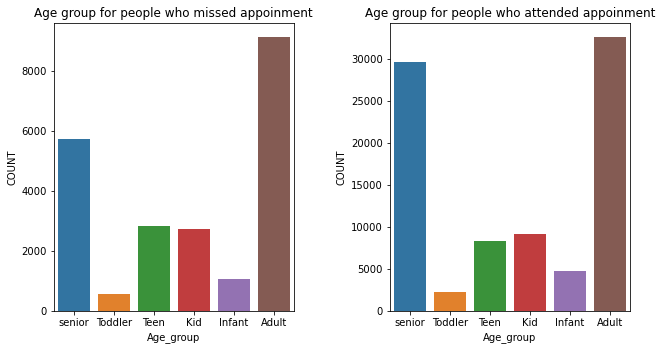

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
yes_data.sort_values(by='AgeGroup', ascending=False,inplace = True)
no_data.sort_values(by='AgeGroup', ascending=False,inplace = True)

sns.countplot(x='AgeGroup',data = no_data,ax=axes[0])
axes[0].title.set_text('Age group for people who missed appoinment')
axes[0].set_ylabel('COUNT')
axes[0].set_xlabel('Age_group')
sns.countplot(x='AgeGroup',data = yes_data,ax=axes[1])
axes[1].title.set_text('Age group for people who attended appoinment')
axes[1].set_ylabel('COUNT')
axes[1].set_xlabel('Age_group')
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)


Adults are the most to miss their appointments but this is due to their high number in the data, comparing ratios and we see that seniors are more serious about attending their appointments while the teen group tend to skip their appointments more so that makes **Teens age group miss their appointments the most**

<a id='conclusions'></a>
## Conclusions

So wo sum up, teens are the most group with appointments missed and that is a confirmation to a previous question in which we found that having a liability of some sort does not affect your decision to skip the meeting since most of teens are still in good shape, also we found out that skipping an appointment is the patient decision

## Limitations


So far we know that skipping an appointment is the patient decision but we do not know what is driving this decision or what is the main reason that a patient decided not to go to the appointment, did he/she feel better and thought that this will be a waste of money?, did he/she had an emergency that day?, did he/she has a close friend who had the same symptoms and described their medicine for them?, what ever is the reason we simply do not have enough data to know it.